# Academic honesty disclaimer
- We used some LLM codes to be able to display certain things we wanted to see, like the feature interaction with wins heatmap!

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load dataset
df = pd.read_csv("dataset(data) (3).csv")
df.head()

,Season,Opponent,Home,Win,MOV,Streak,Rk,Age,W/L,ExW/L,...,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Record
0,2024-2025,New York Knicks,0,1,23,0,7,27.5,0.641026,0.628205,...,0.591,0.558,11.9,25.9,0.187,0.547,13.0,74.4,0.174,0.636364
1,2024-2025,Washington Wizards,1,1,20,1,30,23.6,0.217949,0.179487,...,0.547,0.513,13.6,22.8,0.180,0.550,11.5,71.9,0.201,0.666667
2,2024-2025,Detroit Pistons,1,1,6,2,12,25.8,0.551282,0.564103,...,0.579,0.545,13.1,26.2,0.195,0.536,13.3,76.2,0.215,0.777778
3,2024-2025,Milwaukee Bucks,0,1,11,3,13,29.4,0.564103,0.564103,...,0.596,0.566,12.2,19.3,0.200,0.532,11.4,76.3,0.178,1.000000
4,2024-2025,Indiana Pacers,1,0,-3,4,11,25.8,0.602564,0.564103,...,0.598,0.566,11.8,21.0,0.189,0.547,13.1,74.5,0.193,0.444444


## Correlation Matrix

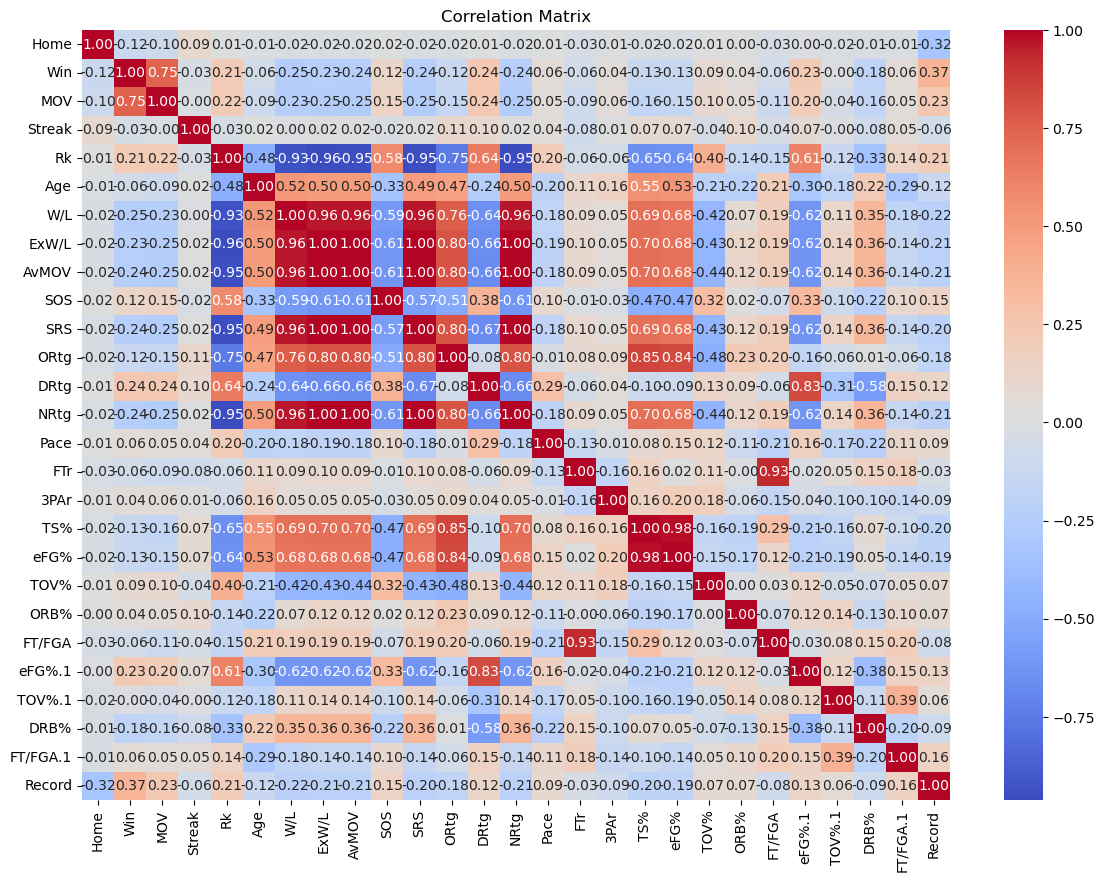

In [4]:
# Correlation matrix to explore relationships
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlation Matrix Summary

#### Strongest Positive Correlations with `Win`:
- **MOV (Margin of Victory)**: `+0.75`  
  - The most positively correlated feature. Teams that win by large margins tend to have more total wins.
- **ExW/L (Expected Win/Loss)**: `+0.70`  
  - Strong indicator of overall team performance and consistency.
- **NRtg (Net Rating)**: `+0.70`  
  - Measures the difference between offensive and defensive efficiency; higher net rating means more wins.
- **W/L (Win/Loss ratio)** and **AvMOV (Average Margin of Victory)**: `~+0.69 to +0.70`  
  - Consistently winning and doing so by larger margins boosts win count.
- **ORTg (Offensive Rating)**: `+0.57`  
  - Teams with better offensive efficiency generally win more games.

#### Strongest Negative Correlations with `Win`:
- **Rk (Team Rank)**: `-0.93`  
  - Lower numerical rank (e.g., Rank 1) correlates with more wins. Highly outcome-dependent, use cautiously.
- **DRtg (Defensive Rating)**: `-0.64`  
  - Better defensive teams (lower DRtg) tend to win more games.
- **Opponent eFG% (eFG%)**: `-0.62`  
  - Allowing opponents to shoot efficiently is strongly linked to fewer wins.
- **TOV% (Turnover Percentage)**: `-0.43`  
  - More turnovers = fewer wins.

####  Weak or No Correlation with `Win`:
- **Age**, **Pace**, **3PAr (3-point attempt rate)**: Very weak correlation
  - These features may not significantly impact win totals in this dataset.

#### Key Takeaway:
- Winning is most associated with **margin of victory**, **net rating**, and **expected win/loss metrics**.
- **Both offensive and defensive efficiency** play important roles.
- Be cautious using **Rank** in predictive models since it reflects win outcomes directly.

## Win Rate by Home/Away

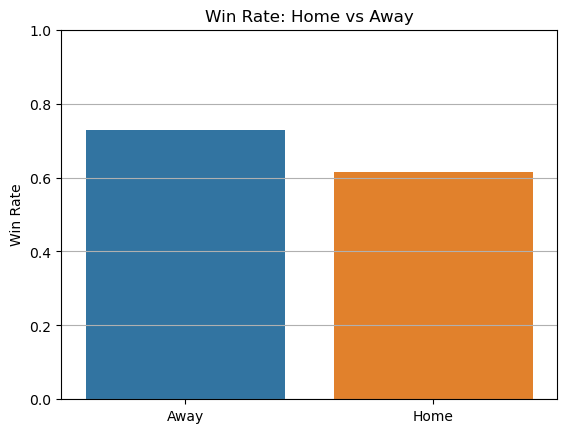

In [5]:
# Win rate comparison between home and away games
home_win_rate = df.groupby("Home")["Win"].mean().reset_index()
home_win_rate["Home"] = home_win_rate["Home"].map({1: "Home", 0: "Away"})

sns.barplot(data=home_win_rate, x="Home", y="Win")
plt.title("Win Rate: Home vs Away")
plt.ylabel("Win Rate")
plt.xlabel("")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

The Celtics generally perform better home, than away.

## Box Plot: Offensive Rating vs Win

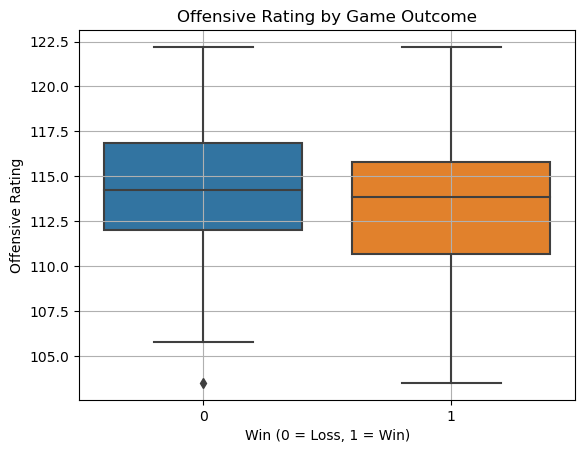

In [6]:
sns.boxplot(data=df, x="Win", y="ORtg")
plt.title("Offensive Rating by Game Outcome")
plt.xlabel("Win (0 = Loss, 1 = Win)")
plt.ylabel("Offensive Rating")
plt.grid(True)
plt.show()

This box plot shows that teams don’t necessarily need a higher offensive rating to win. In fact, teams that lost had slightly higher median offensive ratings. This suggests that winning may rely more on defense or overall efficiency, not just scoring alone.

## Scatter Plot: Pace vs Net Rating (Colored by Win)

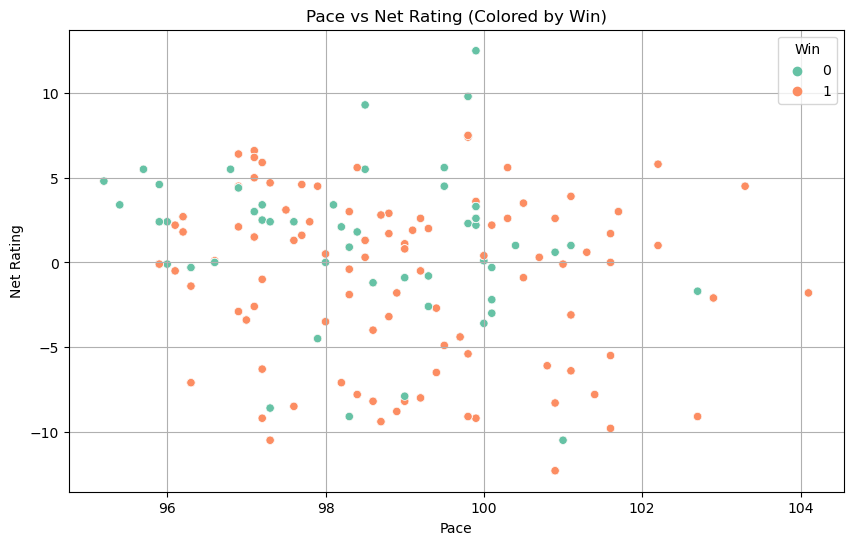

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Pace", y="NRtg", hue="Win", palette="Set2")
plt.title("Pace vs Net Rating (Colored by Win)")
plt.xlabel("Pace")
plt.ylabel("Net Rating")
plt.grid(True)
plt.show()

This scatter plot shows that teams with higher net ratings are more likely to win, regardless of their pace. Pace doesn’t seem to have a strong relationship with game outcome, rather it’s the efficiency (net rating) that really makes the difference.

## Heatmap: Feature Interactions with Win

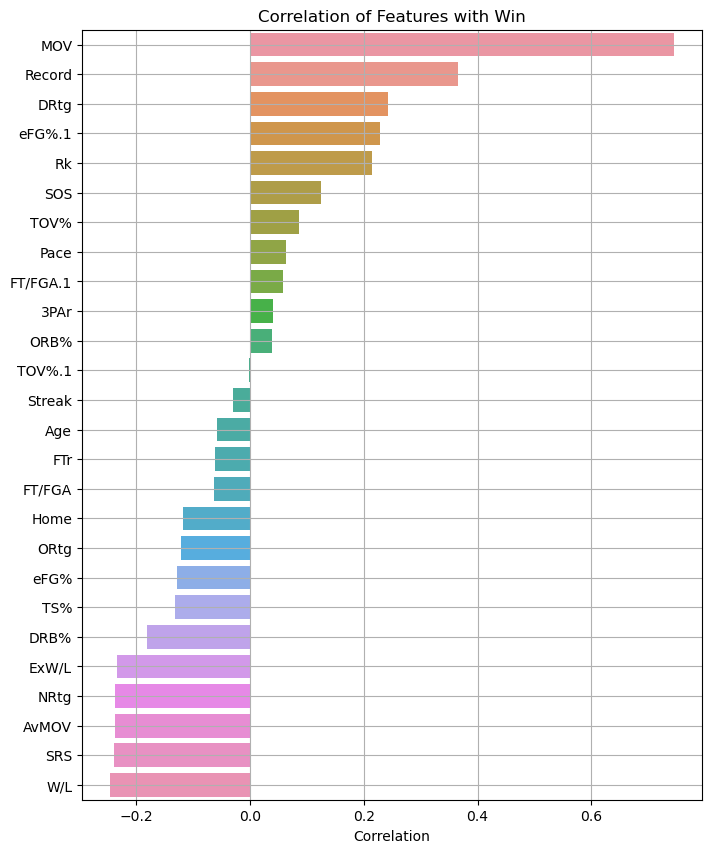

In [9]:
# Calculate correlation with 'Win' only
target_corr = df.corr(numeric_only=True)["Win"].drop("Win").sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Correlation of Features with Win")
plt.xlabel("Correlation")
plt.grid(True)
plt.show()

### Summary

- **Top features that help predict wins** are:
  - **MOV (Margin of Victory)** – Teams that win by more points tend to win more games.
  - **Record**, **W/L %, Net Rating (NRtg)**, and **SRS** – These all show strong positive relationships with winning.
- **DRtg (Defensive Rating)** shows a strong **negative** correlation:
  - A lower DRtg (better defense) is linked to more wins.
- **Some features have weak or no impact**, like:
  - **Age**, **Streak**, **3PAr (3-point attempt rate)**, and **FT/FGA**.
- Overall, **team efficiency** (offense and defense) and **point differential** are the most important predictors of winning.


## Pairplot: Visualizing Relationships Between Key Variables

/Users/willemlevine/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


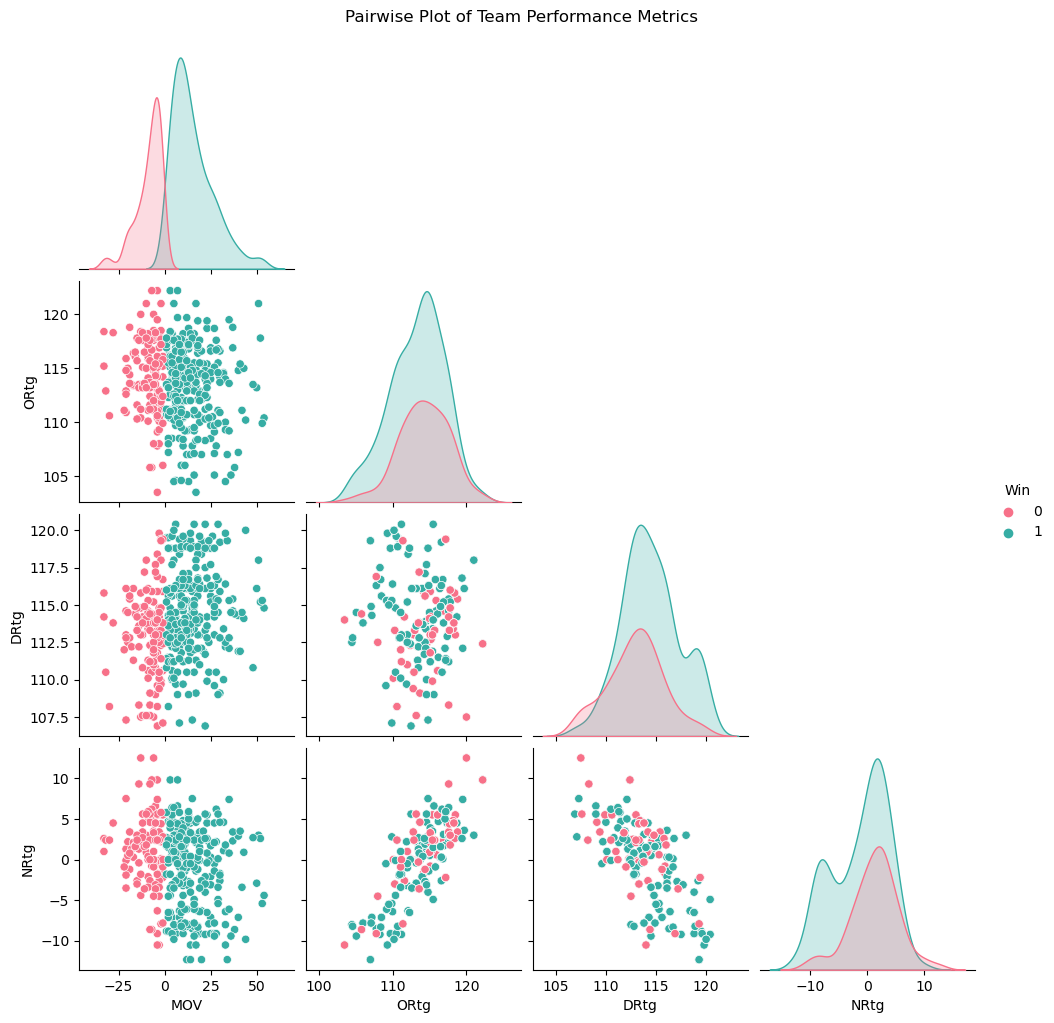

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[["MOV", "ORtg", "DRtg", "NRtg", "Win"]], hue="Win", palette="husl", corner=True)
plt.suptitle("Pairwise Plot of Team Performance Metrics", y=1.02)
plt.show()

### Summary

This pairplot compares **Offensive Rating (ORTg)**, **Defensive Rating (DRtg)**, and **Net Rating (NRtg)** by win outcome (0 = loss, 1 = win):

- **ORTg (Offensive Rating)**:
  - Teams that win (teal) tend to have slightly higher offensive ratings.
  - There's a clear shift in the distribution toward higher ORTg for wins.

- **DRtg (Defensive Rating)**:
  - Winning teams also show slightly lower DRtg (better defense).
  - The separation is less dramatic than ORTg but still visible.

- **NRtg (Net Rating)**:
  - This shows the most clear separation — winning teams generally have positive NRtg, while losing teams cluster around 0 or below.
  - Strong correlation pattern visible with both ORTg and DRtg.

Overall, this plot confirms that **better offensive and net ratings are strong indicators of winning**, while **defensive rating also contributes** but with a slightly less distinct visual separation.
